In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

from ionpy.analysis import ResultsLoader
from ese.experiment.experiment import CalibrationExperiment
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

%load_ext yamlmagic
%load_ext autoreload
%autoreload 2

In [2]:
path = f"{root}/WMH_aug_runs"

dfc = rs.load_configs(
    path,
    properties=False,
)

df = rs.load_metrics(dfc)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

best_exp = rs.get_best_experiment(
    df=df,
    exp_class=CalibrationExperiment,
    device="cuda"
)
best_exp.build_dataloader(batch_size=1)

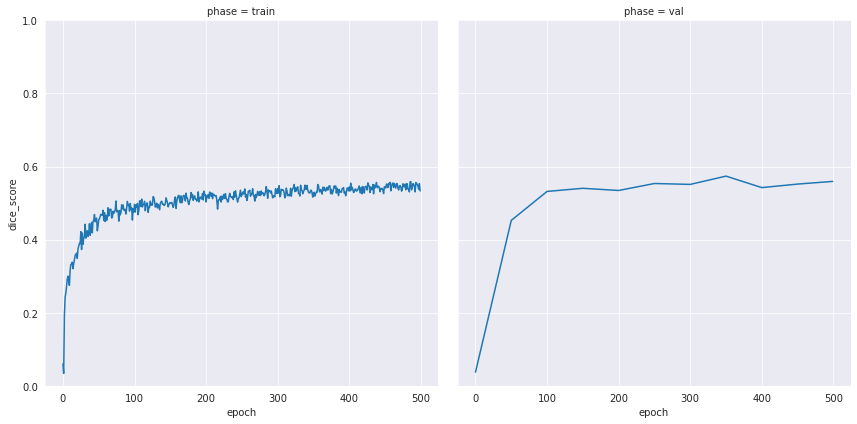

In [4]:
best_exp.vis_loss_curves(height=6)

In [5]:
from ese.experiment.analysis.inference import get_dataset_perf 

# val_perf is a dict where each item is the subj id
predictions_list, unique_labels = get_dataset_perf(
    exp=best_exp, 
    split="val"
    )

  0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
len(predictions_list), len(unique_labels)

(15, 2)

In [7]:
from ese.experiment.analysis.inference import get_pixelinfo_df

pixel_preds_df = get_pixelinfo_df(
    data_points=predictions_list,
    num_bins=10,
    conf_interval=[0.5, 1.0]
    )

  0%|          | 0/15 [00:00<?, ?it/s]

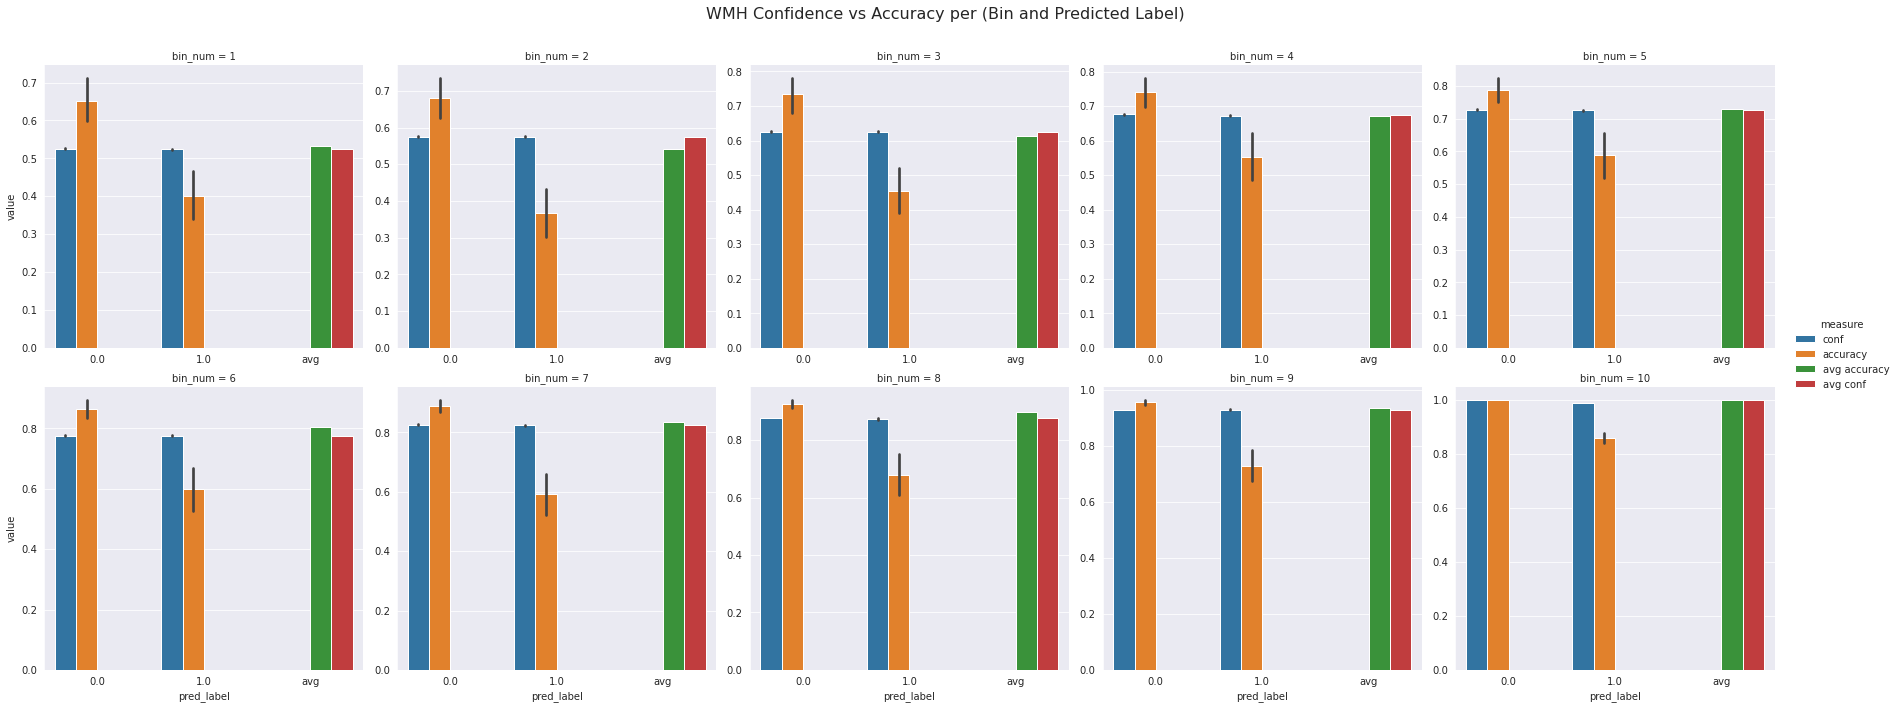

In [8]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_df,
    title="WMH Confidence vs Accuracy per (Bin and Predicted Label)",
    x="pred_label",
    hue="measure",
    col="bin_num",
    kind="bar",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False}
    )

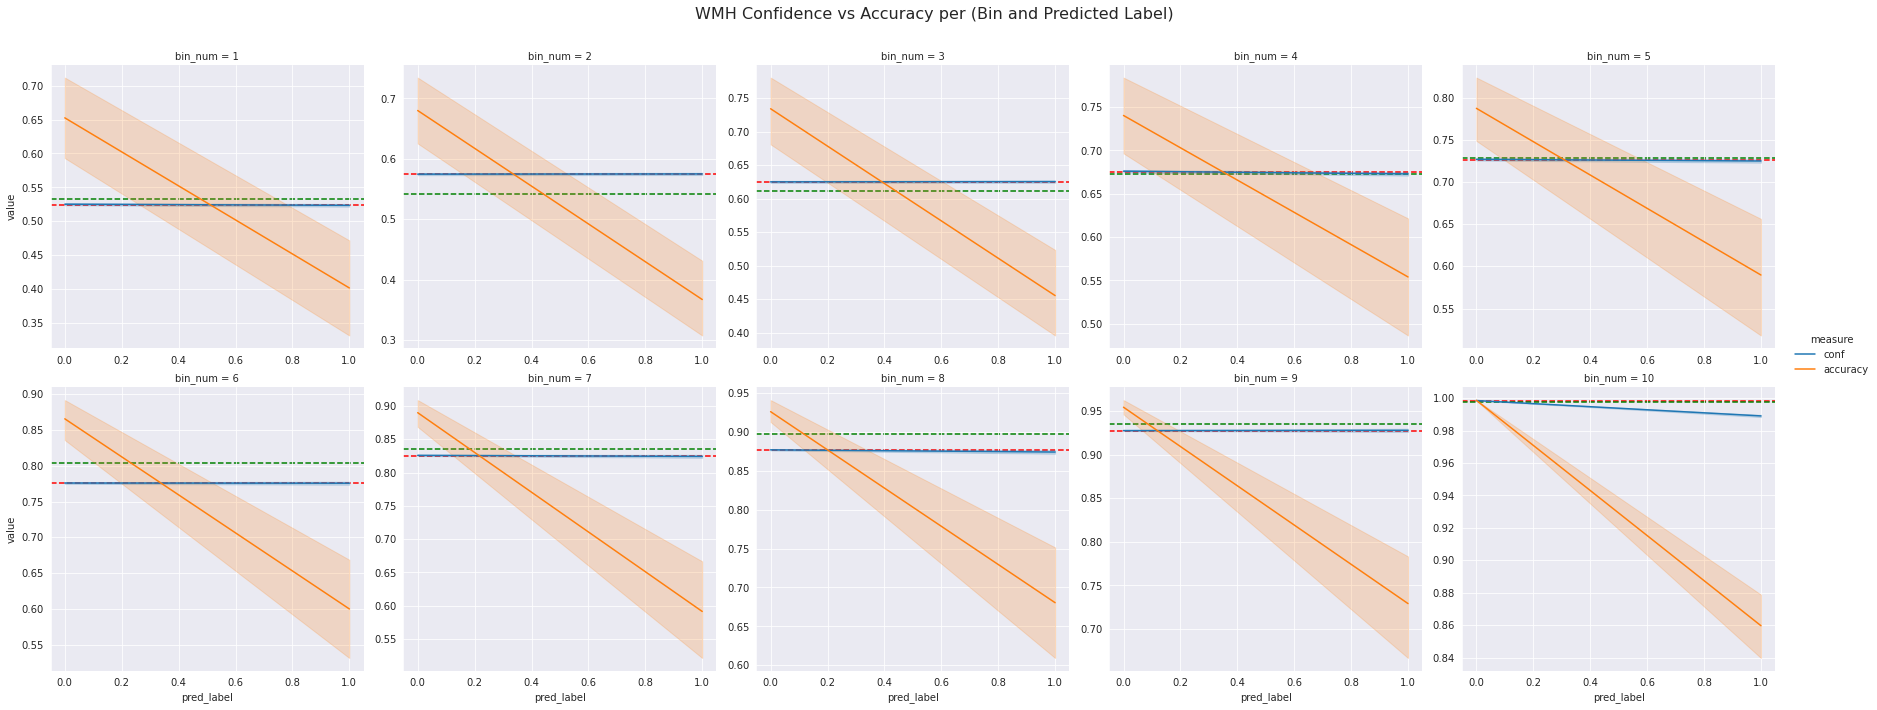

In [9]:
# THIS IS NOT A GOOD PLOT FOR WMH

from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_df,
    title="WMH Confidence vs Accuracy per (Bin and Predicted Label)",
    x="pred_label",
    hue="measure",
    col="bin_num",
    kind="line",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False}
    )

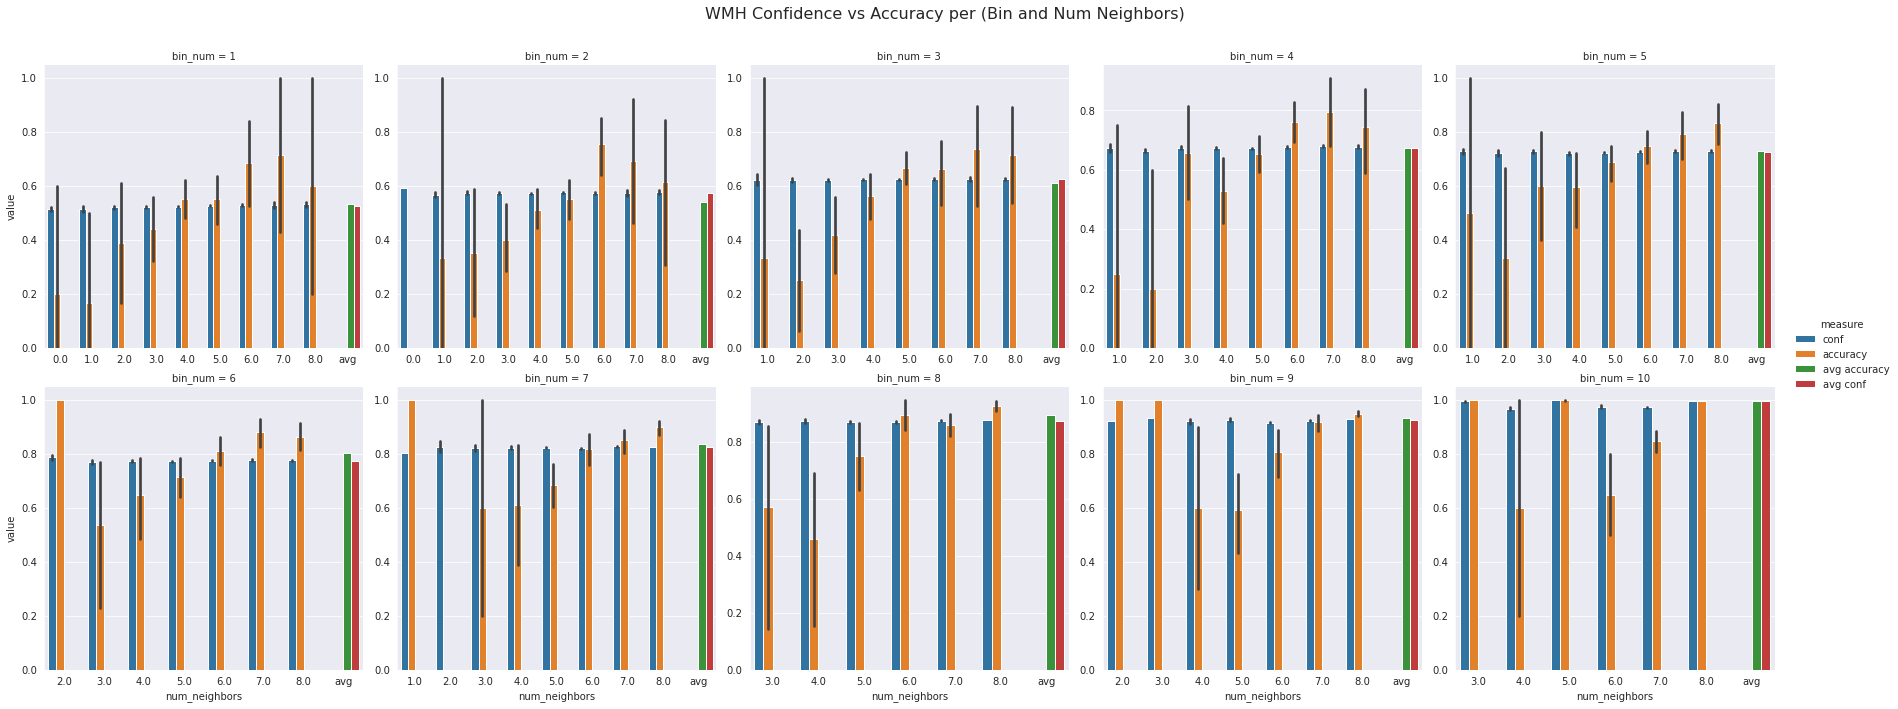

In [10]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_df,
    title="WMH Confidence vs Accuracy per (Bin and Num Neighbors)",
    x="num_neighbors",
    hue="measure",
    col="bin_num",
    kind="bar",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

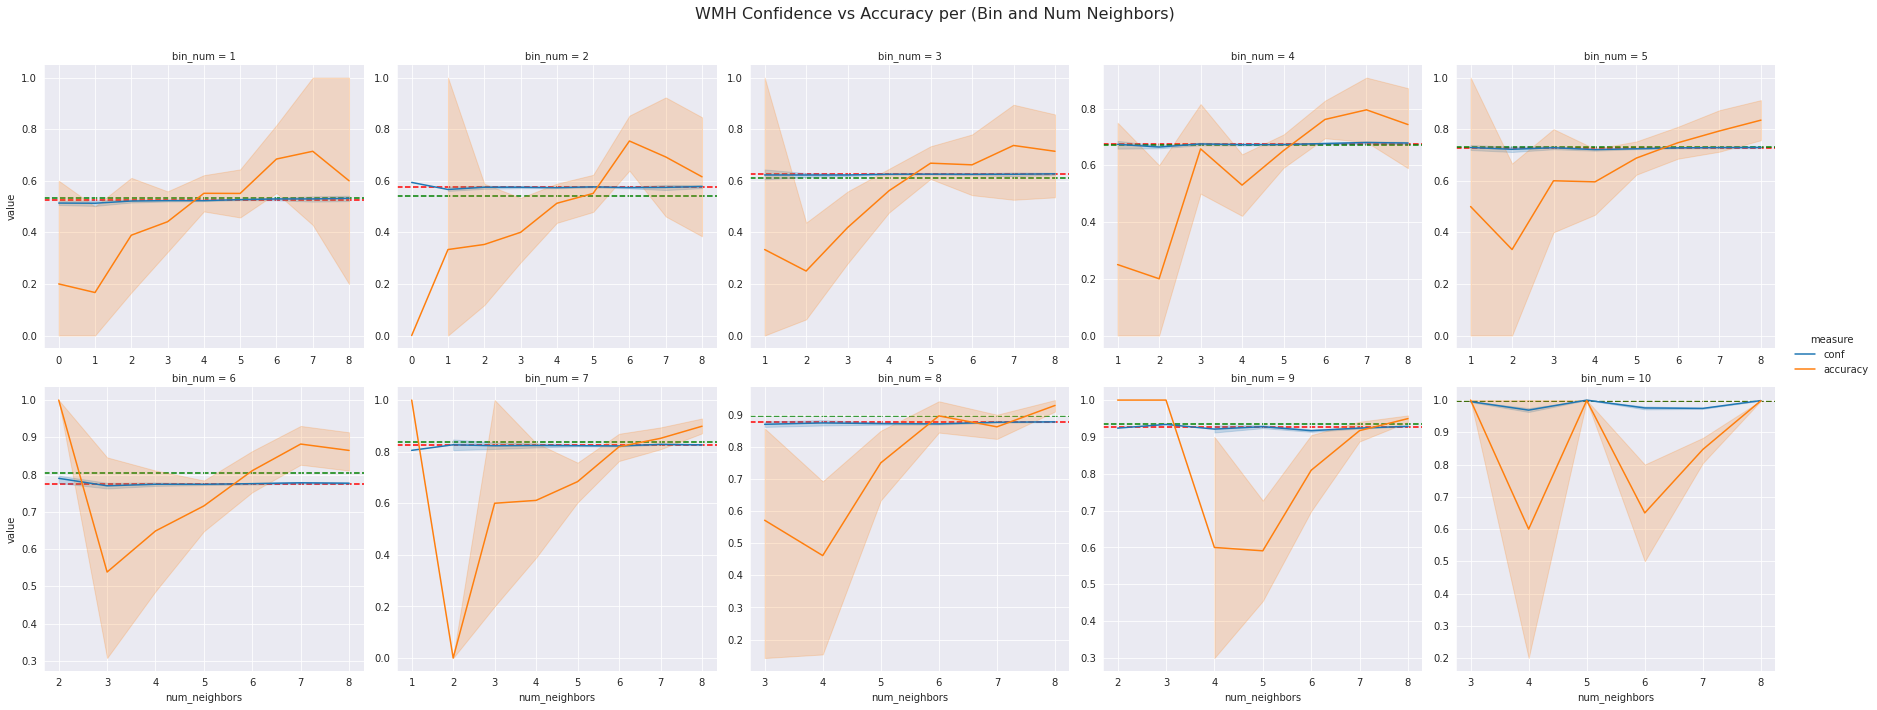

In [11]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_df,
    title="WMH Confidence vs Accuracy per (Bin and Num Neighbors)",
    x="num_neighbors",
    hue="measure",
    col="bin_num",
    kind="line",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

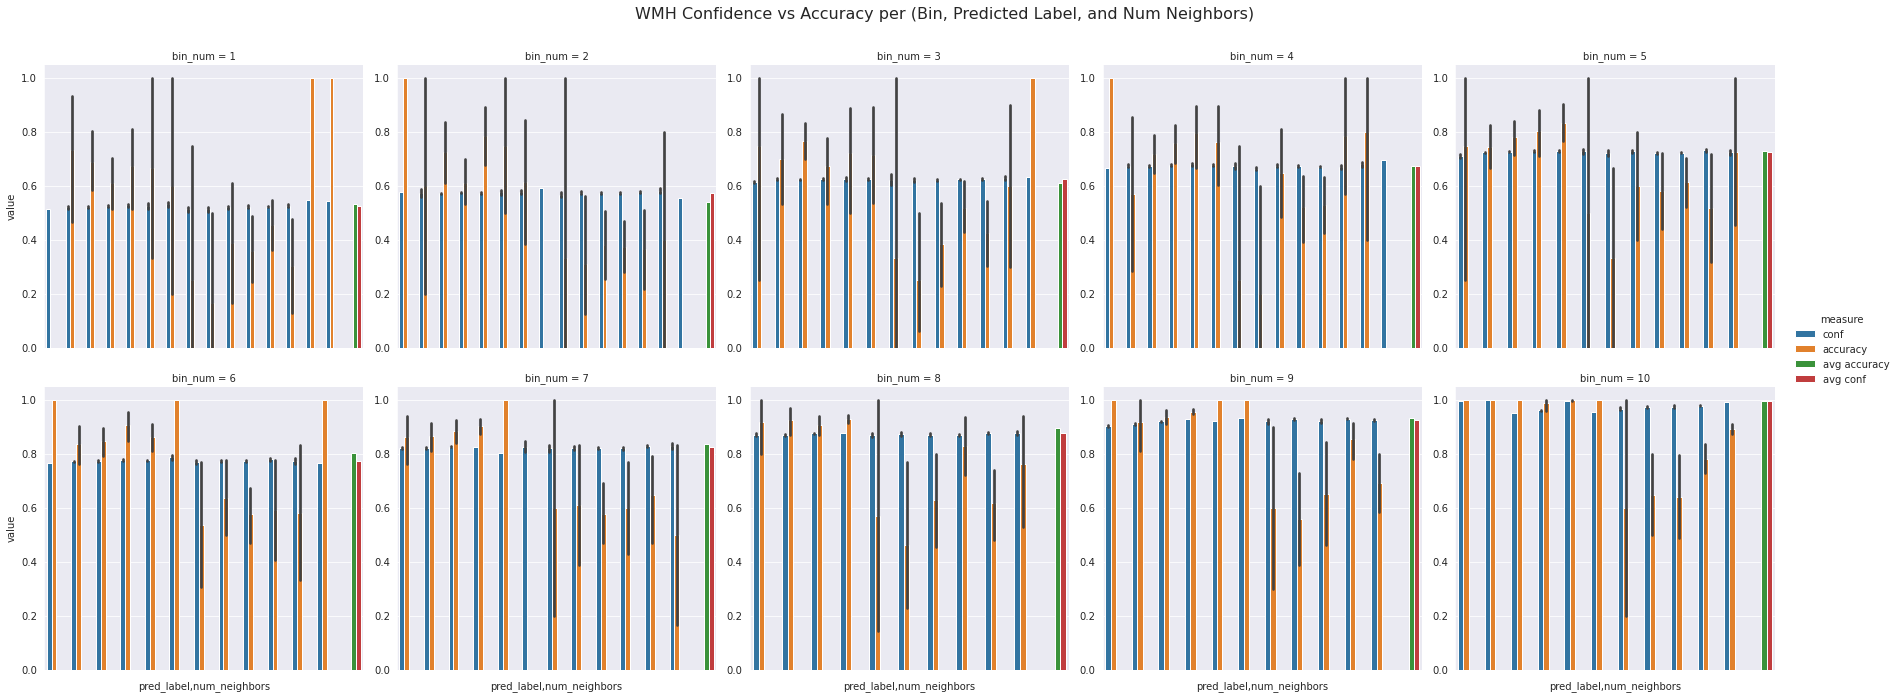

In [12]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_df,
    title="WMH Confidence vs Accuracy per (Bin, Predicted Label, and Num Neighbors)",
    x="pred_label,num_neighbors",
    hue="measure",
    col="bin_num",
    kind="bar",
    x_labels=False,
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

[autoreload of ese.experiment.metrics.utils.utils failed: Traceback (most recent call last):
  File "/local/vbutoi/envs/UniverSegTF/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/local/vbutoi/envs/UniverSegTF/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/local/vbutoi/envs/UniverSegTF/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/storage/vbutoi/projects/ESE/ese/experiment/metrics/utils/utils.py", line 6, in <module>
    from .utils import process_for_scoring, get_conf_region, init_stat_tracker
ImportError: cannot import name 'process_for_scoring' from 'ese.ex

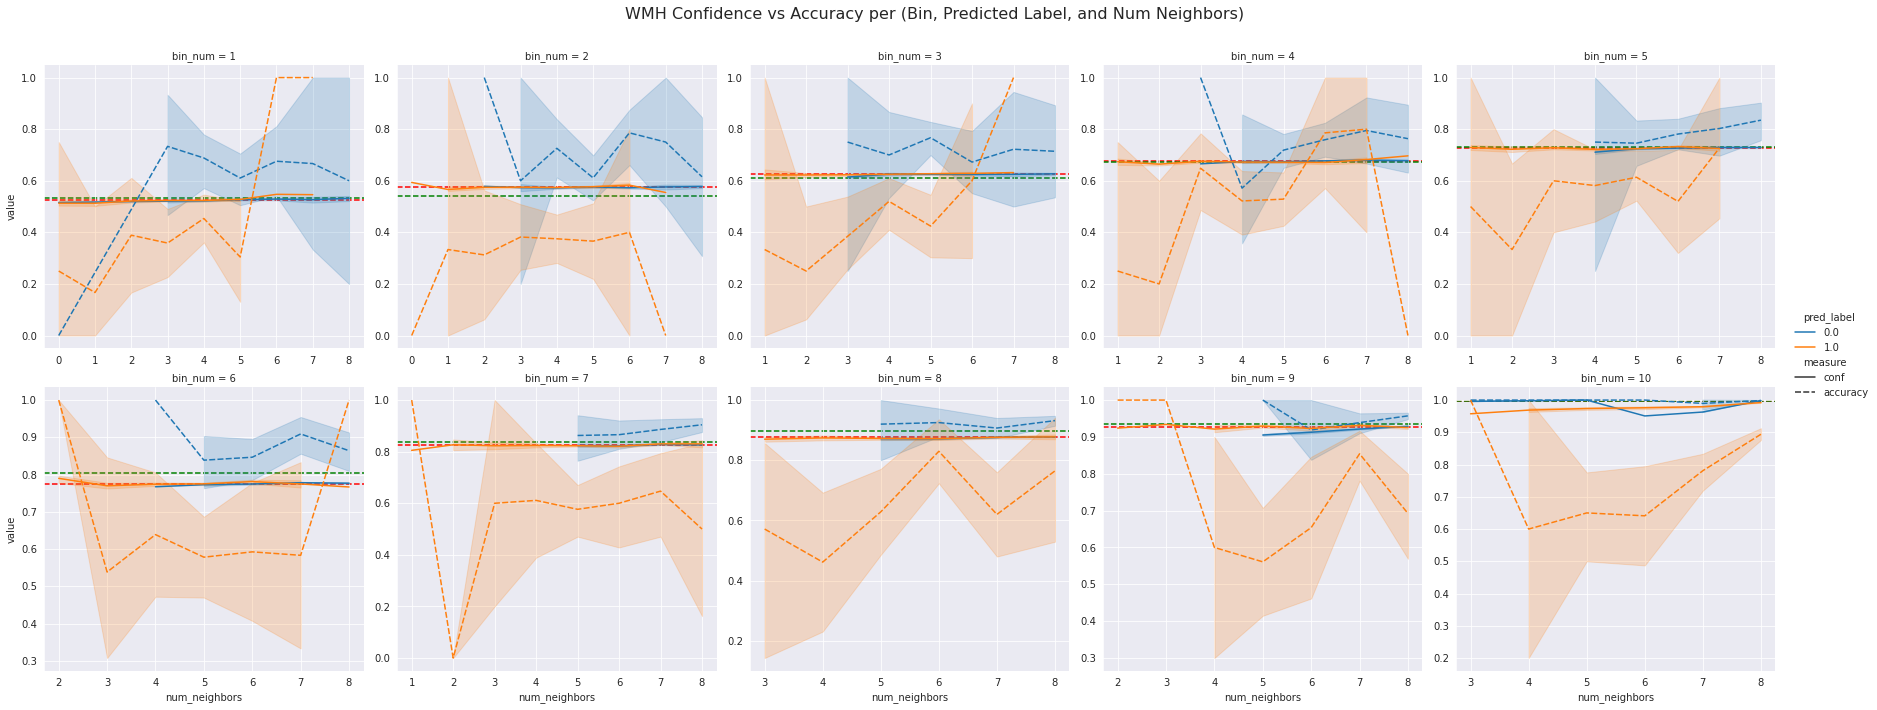

In [13]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_df,
    title="WMH Confidence vs Accuracy per (Bin, Predicted Label, and Num Neighbors)",
    x="num_neighbors",
    hue="pred_label",
    col="bin_num",
    kind="line",
    style="measure",
    add_average=True,
    facet_kws={'sharey': False, 'sharex': False}
    )